# Lin Reg portion: function crashes kernal after 1 use

In [58]:
import pandas as pd
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression as LinReg
lr_model = LinReg()

train_numeric = pd.read_csv('./data/train_lonlat_id_CS_0523_feature_numeric.csv')
test_numeric = pd.read_csv('./data/test_lonlat_id_CS_0523_feature_numeric.csv')
#macro_numeric = pd.read_csv('./data/macro_feature_CS_0521.csv')

print train_numeric.shape, test_numeric.shape, macro_numeric.shape

(30471, 300) (7662, 300) (2484, 1504)


In [2]:
top_col = [u'full_sq', u'life_sq', u'floor', u'build_year', u'max_floor',
       u'month_year_cnt', u'week_year_cnt', u'kitch_sq', u'num_room', u'state',
       u'kindergarten_km', u'radiation_km', u'school_km', u'material',
       u'metro_min_avto', u'railroad_km', u'industrial_km', u'green_zone_km',
       u'theater_km', u'swim_pool_km', u'big_church_km', u'water_km',
       u'railroad_station_walk_km', u'hospice_morgue_km', u'mosque_km',
       u'cemetery_km', u'fitness_km', u'nuclear_reactor_km',
       u'church_synagogue_km', u'park_km', u'green_part_500',
       u'hospital_beds_raion', u'market_shop_km', u'thermal_power_plant_km',
       u'sadovoe_km', u'ice_rink_km', u'water_treatment_km', u'office_sqm_500',
       u'green_part_1500', u'preschool_quota']

x_train, x_test, y_train, y_test = cross_validation.train_test_split(train_numeric[top_col], train_numeric['log_price_doc'], random_state=0, train_size=0.7)
print map(lambda i: i.shape, [x_train, y_train, x_test, y_test])

[(21329, 40), (21329,), (9142, 40), (9142,)]


In [3]:
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline
def train_model_lr(X_train, y_train):
    parameter_grid = {'lr__fit_intercept': [False, True]}
    pipeline = Pipeline([("imputer", Imputer(strategy="median",
                                              axis=0)),
                          ("scaler", StandardScaler()),
                          ("lr", LinReg())])
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=parameter_grid,
                               cv=5,
                               verbose=2,
                               n_jobs=5,
                               refit=True)
    return auto_grid(grid_search, X_train, y_train)
def auto_grid(grid_search, X_train, y_train):
    grid_search.fit(X_train, y_train)
    print '\n All grid results: \n'
    print grid_search.grid_scores_
    print 'Best score {}: {}'.format('lr', grid_search.best_score_)
    print 'Best parameters {}: {}'.format('lr', grid_search.best_params_)
    plt.scatter(grid_search.best_estimator_.predict(X_train), y_train)

/Users/samo/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
train_index = [u'full_sq', u'build_year', u'max_floor', u'month_year_cnt', u'num_room']

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[CV] lr__fit_intercept=False .........................................


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[CV] ................................ lr__fit_intercept=False -   0.1s
[CV] ................................ lr__fit_intercept=False -   0.1s
[CV] lr__fit_intercept=True ..........................................
[CV] lr__fit_intercept=True ..........................................


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[CV] ................................ lr__fit_intercept=False -   0.2s


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[CV] lr__fit_intercept=True ..........................................
[CV] ................................ lr__fit_intercept=False -   0.2s


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[CV] lr__fit_intercept=True ..........................................
[CV] ................................ lr__fit_intercept=False -   0.2s
[CV] ................................. lr__fit_intercept=True -   0.1s
[CV] lr__fit_intercept=True ..........................................
[CV] ................................. lr__fit_intercept=True -   0.1s
[CV] ................................. lr__fit_intercept=True -   0.1s
[CV] ................................. lr__fit_intercept=True -   0.1s
[CV] ................................. lr__fit_intercept=True -   0.1s


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.4s finished
/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)



 All grid results: 

[mean: -687.67171, std: 71.47182, params: {'lr__fit_intercept': False}, mean: 0.23034, std: 0.05856, params: {'lr__fit_intercept': True}]
Best score lr: 0.230339216705
Best parameters lr: {'lr__fit_intercept': True}


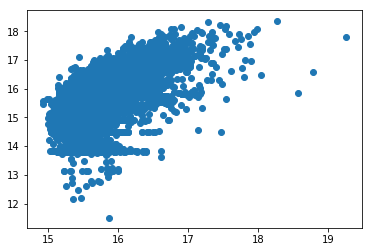

In [5]:
train_model_lr(train_numeric[train_index], train_numeric['log_price_doc'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................
[CV] lr__fit_intercept=False .........................................


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, Runti

[CV] ................................ lr__fit_intercept=False -   1.2s
[CV] lr__fit_intercept=True ..........................................
[CV] ................................ lr__fit_intercept=False -   1.2s
[CV] lr__fit_intercept=True ..........................................


/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[CV] ................................ lr__fit_intercept=False -   1.3s
[CV] lr__fit_intercept=True ..........................................
[CV] ................................ lr__fit_intercept=False -   1.2s
[CV] lr__fit_intercept=True ..........................................
[CV] ................................ lr__fit_intercept=False -   1.3s
[CV] lr__fit_intercept=True ..........................................
[CV] ................................. lr__fit_intercept=True -   1.4s
[CV] ................................. lr__fit_intercept=True -   1.4s
[CV] ................................. lr__fit_intercept=True -   1.4s
[CV] ................................. lr__fit_intercept=True -   1.4s


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    3.0s remaining:    1.3s


[CV] ................................. lr__fit_intercept=True -   1.4s


[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    3.2s finished
/Users/samo/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)



 All grid results: 

[mean: -687.52318, std: 72.33882, params: {'lr__fit_intercept': False}, mean: 0.32677, std: 0.07943, params: {'lr__fit_intercept': True}]
Best score lr: 0.326765456508
Best parameters lr: {'lr__fit_intercept': True}


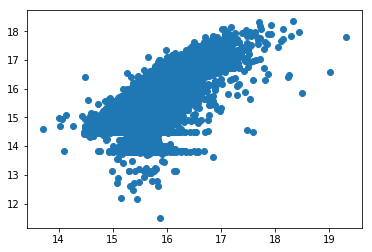

In [5]:
train_model_lr(train_numeric[top_col], train_numeric['log_price_doc'])

In [6]:
from datetime import datetime as dt
train_numeric['timestamp'] = pd.to_datetime(train_numeric['timestamp'])
macro_numeric['timestamp'] = pd.to_datetime(macro_numeric['timestamp'])
test_numeric['timestamp'] = pd.to_datetime(test_numeric['timestamp'])
macro_numeric['day'] = [int(dt.strftime(x, '%d')) for x in macro_numeric['timestamp']]
train_numeric['day'] = [int(dt.strftime(x, '%d')) for x in train_numeric['timestamp']]
test_numeric['day'] = [int(dt.strftime(x, '%d')) for x in test_numeric['timestamp']]

# Macro analysis: conversion to unix times

In [53]:
from datetime import datetime as dt
import datetime
import calendar

time_test = macro_numeric.iloc[0,:]
print dt.strftime(time_test['timestamp'], '%Y-%m-%d')
macro_numeric['unixtime']=[calendar.timegm(dt(macro_numeric['year'][x], macro_numeric['month'][x], macro_numeric['day'][x], 0, 0).timetuple()) for x in range(macro_numeric.shape[0])]
train_numeric['unixtime']=[calendar.timegm(dt(train_numeric['year'][x], train_numeric['month'][x], train_numeric['day'][x], 0, 0).timetuple()) for x in range(train_numeric.shape[0])]


2010-01-01


KeyError: 'day'

In [ ]:
test_numeric['unixtime']=[calendar.timegm(dt(test_numeric['year'][x], test_numeric['month'][x], test_numeric['day'][x], 0, 0).timetuple()) for x in range(test_numeric.shape[0])]

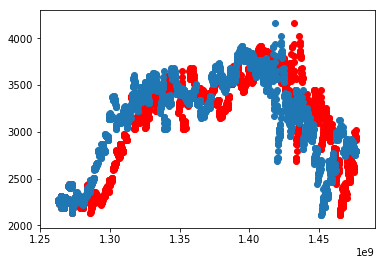

In [9]:
plt.scatter(macro_numeric['unixtime'], macro_numeric['oil_rub_shift_153'], color='red')
plt.scatter(macro_numeric['unixtime'], macro_numeric['oil_rub'])

In [116]:
np.mean(macro_numeric['oil_rub_shift_153'][2:4])

2275.7705

# Rolling average function definitions

In [10]:
def rolling_average(unit, column_str, norm=0, offset=0):
    return [offset+np.mean(macro_numeric[column_str][i:i+unit])/(2*(1-norm)+norm*np.mean(macro_numeric[column_str])) for i in range(macro_numeric.shape[0]-unit)]

def plot_ra(unit, column_str='oil_rub', split=0.5, norm=0, offset=0):
    try:
        plt.scatter(macro_numeric['unixtime'][int(unit*split):int(-unit*(1-split))], rolling_average(unit, column_str, norm=norm, offset=offset), alpha = 0.2)
    except:
        try:
            plt.scatter(macro_numeric['unixtime'][int(unit*split):1+int(-unit*(1-split))], rolling_average(unit, column_str, norm=norm, offset=offset), alpha = 0.2)
        except:
            plt.scatter(macro_numeric['unixtime'][int(unit*split):-1+int(-unit*(1-split))], rolling_average(unit, column_str, norm=norm, offset=offset), alpha = 0.2)

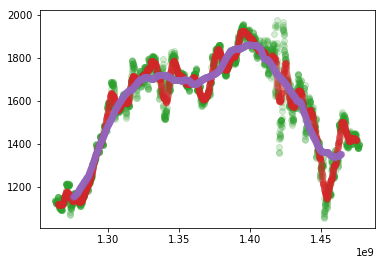

In [302]:
plot_ra(3)
plot_ra(50)
plot_ra(300)

In [200]:
macro_numeric['oil_ra300'] = 0
macro_numeric['oil_ra300'][300:] = rolling_average(300, 'oil_rub')

/Users/samo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Derivative function definitions

In [11]:
def derivative_value(column_str, unit=1, norm=0, offset=0):
    return [offset+(np.mean(macro_numeric[column_str][i+unit:i+2*unit])-np.mean(macro_numeric[column_str][i:i+unit]))/(2*(1-norm)+norm*np.mean(macro_numeric[column_str])) for i in range(0, macro_numeric.shape[0]-2*unit)]

def plot_deriv(unit=1, column_str='oil_rub', split=0.5, norm=0, offset=0):
    pref=2
    #print len(macro_numeric['unixtime'][int(pref*unit*split):int(pref*-unit*(1-split))])
    #print len(derivative_value(unit=unit, column_str=column_str))
    try:
        plt.scatter(macro_numeric['unixtime'][int(pref*unit*split):int(pref*-unit*(1-split))], derivative_value(unit=unit, column_str=column_str, norm=norm, offset=offset), alpha = 0.2)
    except:
        try:
            plt.scatter(macro_numeric['unixtime'][int(pref*unit*split+1):int(pref*-unit*(1-split))], derivative_value(unit=unit, column_str=column_str, norm=norm, offset=offset), alpha = 0.2)
        except:
            plt.scatter(macro_numeric['unixtime'][-2+int(pref*unit*split-1):1+int(pref*-unit*(1-split))], derivative_value(unit=unit, column_str=column_str, norm=norm, offset=offset), alpha = 0.2)

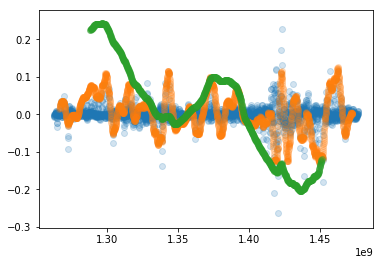

In [359]:
plot_deriv(column_str='oil_rub', unit=3, norm=1)
plot_deriv(column_str='oil_rub', unit=50, norm=1)
plot_deriv(column_str='oil_rub', unit=300, norm=1)

# Rolling average of 300 units and corresponding derivative

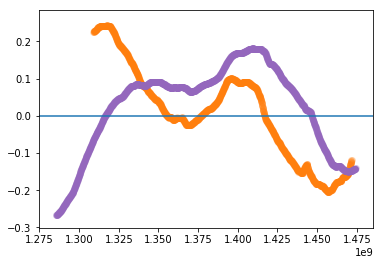

In [350]:
plot_deriv(unit=300, column_str='oil_rub', norm=1, offset=0, split=0.9)
plot_ra(unit=300, column_str='oil_rub', norm=1, offset=-1,split=0.9)
#plt.scatter(macro_numeric['unixtime'], macro_numeric['oil_rub_shift_153']/3000-1, color='red', alpha=0.2)
#plt.scatter(macro_numeric['unixtime'], macro_numeric['oil_rub']/3000-1, alpha=0.2)
plt.axhline(y=0)

## Can save the derivative result into a column and call func again for 2nd, 3rd, ... derivative

# STDEV rolling function definition

In [12]:
def sd_rolling(unit, column_str, norm=0, offset=0):
    return [offset+np.std(macro_numeric[column_str][i:i+unit])/(2*(1-norm)+norm*np.mean(macro_numeric[column_str]/30)) for i in range(macro_numeric.shape[0]-unit)]

def plot_sd(unit, column_str='oil_rub', split=0.5, norm=0, offset=0):
    try:
        plt.scatter(macro_numeric['unixtime'][int(unit*split):int(-unit*(1-split))], sd_rolling(unit, column_str, norm=norm, offset=offset), alpha = 0.2)
    except:
        try:
            plt.scatter(macro_numeric['unixtime'][int(unit*split):1+int(-unit*(1-split))], sd_rolling(unit, column_str, norm=norm, offset=offset), alpha = 0.2)
        except:
            plt.scatter(macro_numeric['unixtime'][int(unit*split):-1+int(-unit*(1-split))], sd_rolling(unit, column_str, norm=norm, offset=offset), alpha = 0.2)

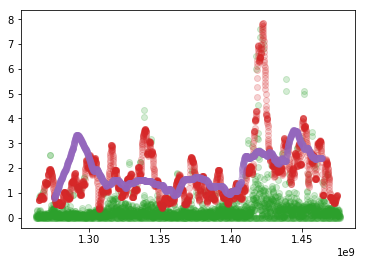

In [374]:
plot_sd(unit=3, norm=0.5)
plot_sd(unit=50, norm=0.5)
plot_sd(unit=300, norm=1)

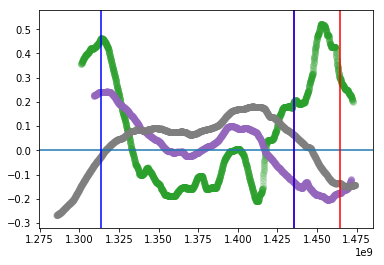

In [404]:
#Green = STDEVIATION
#Grey = Column of interest (Oil_rub here)
#Purple = 1st derivative of column of interest
plot_sd(unit=500, norm=4, offset=-0.5, split=0.9, column_str='oil_rub')
plot_deriv(unit=300, column_str='oil_rub', norm=1, offset=0, split=0.9)
plot_ra(unit=300, column_str='oil_rub', norm=1, offset=-1,split=0.9)

plt.axhline(y=0)
plt.axvline(x=test_numeric['unixtime'].iloc[0], color='red')
plt.axvline(x=test_numeric['unixtime'].iloc[-1], color='red')
plt.axvline(x=train_numeric['unixtime'].iloc[0], color='blue')
plt.axvline(x=train_numeric['unixtime'].iloc[-1], color='blue')
#Blue vertical lines indicate training time range
#Red vertical lines indicate test time range

In [13]:
def final_plots(column_str):
    #Green = STDEVIATION
    #Grey = Column of interest (cpi here)
    #Purple = 1st derivative of column of interest
    fig= plt.figure()
    ax = fig.add_subplot(111)
    plot_sd(unit=500, norm=5, offset=-0.2, split=0.9, column_str=column_str)
    plot_deriv(unit=300, column_str=column_str, norm=1, offset=0, split=0.9)
    plot_ra(unit=300, column_str=column_str, norm=1, offset=-1,split=0.9)
    ax.set(xlabel = 'Unix Time',
           ylabel = 'RA, derivative and SD for {}'.format(column_str),
           title = '{} rolling average plots'.format(column_str))

    plt.axhline(y=0)
    plt.axvline(x=test_numeric['unixtime'].iloc[0], color='red')
    plt.axvline(x=test_numeric['unixtime'].iloc[-1], color='red')
    plt.axvline(x=train_numeric['unixtime'].iloc[0], color='blue')
    plt.axvline(x=train_numeric['unixtime'].iloc[-1], color='blue')
    plt.show()
    #Blue vertical lines indicate training time range
    #Red vertical lines indicate test time range

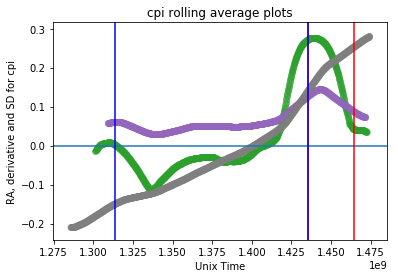

In [413]:
final_plots('cpi')

failed to plot timestamp

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


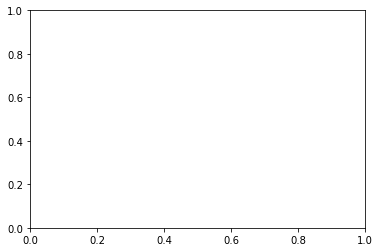

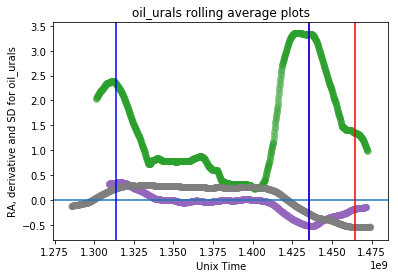

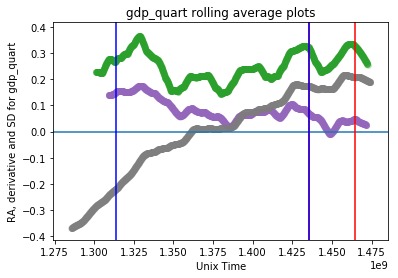

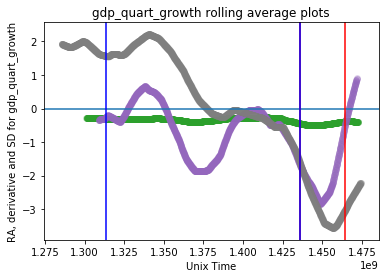

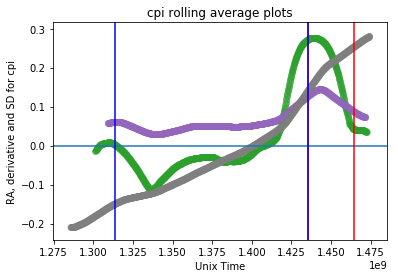

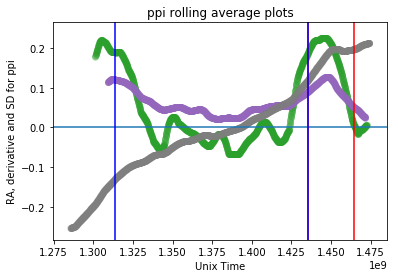

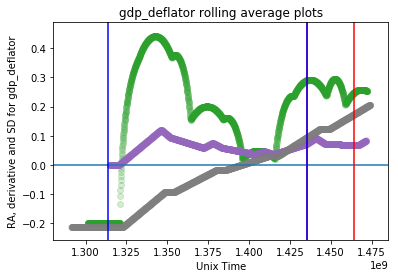

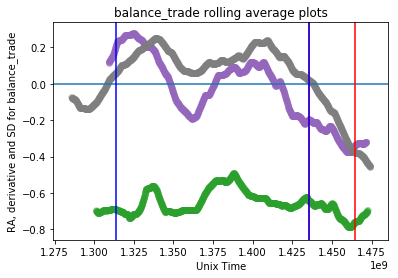

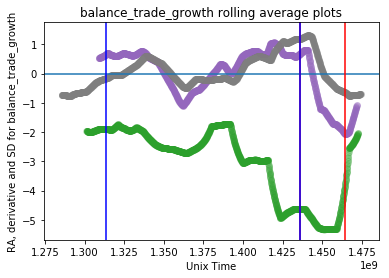

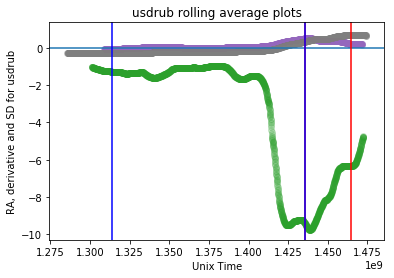

In [16]:
for i in macro_numeric.columns[0:10]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

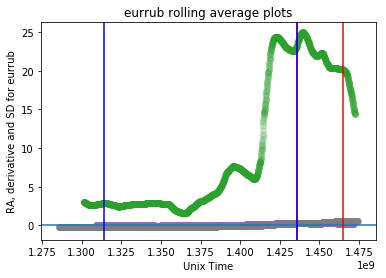

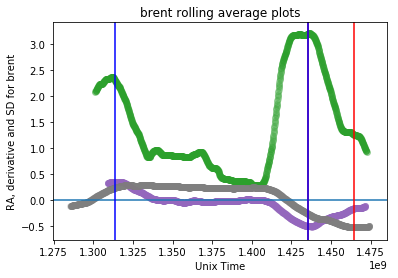

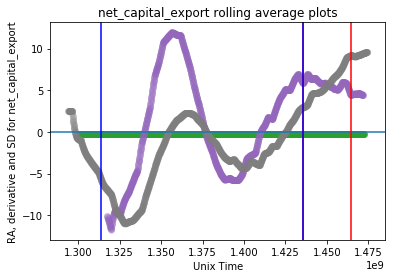

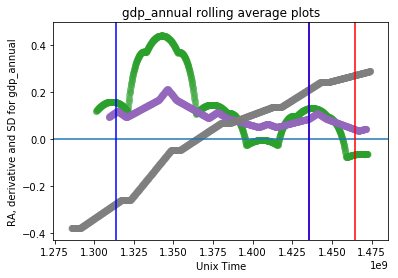

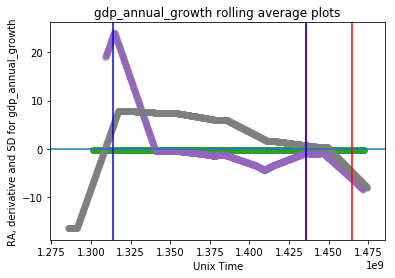

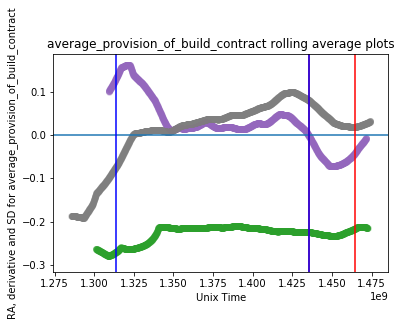

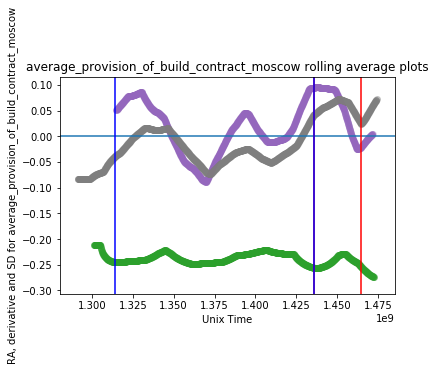

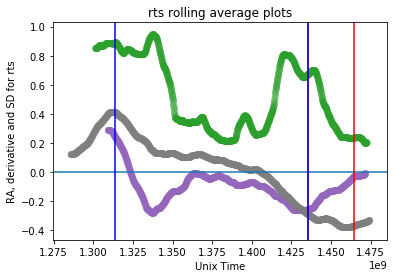

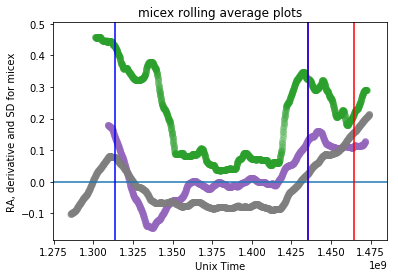

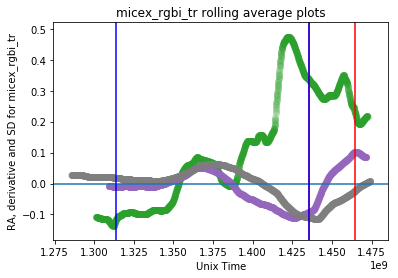

In [17]:
for i in macro_numeric.columns[10:20]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

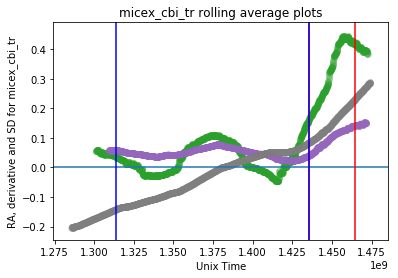

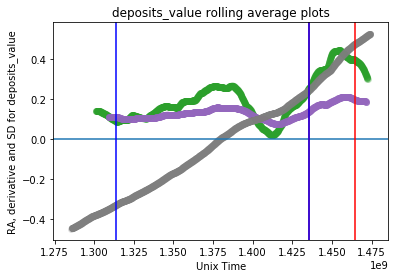

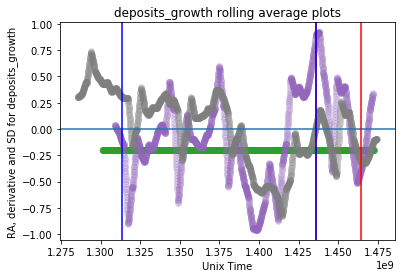

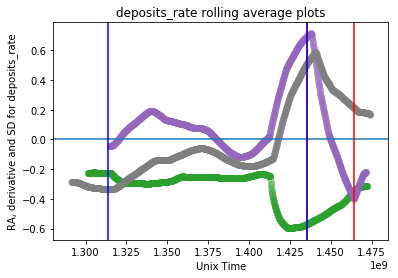

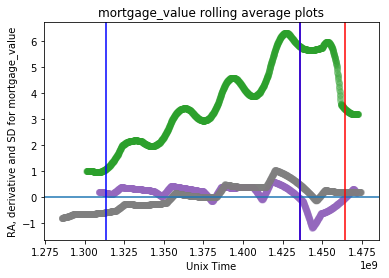

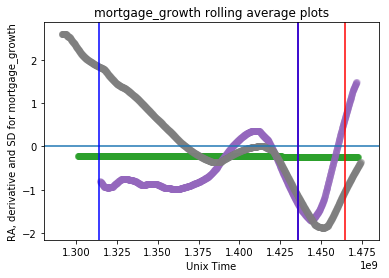

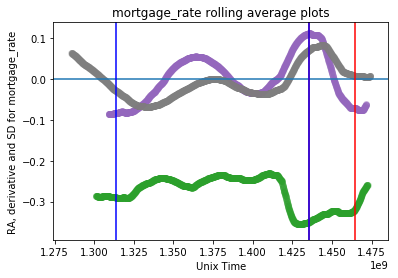

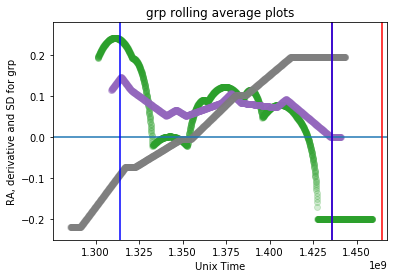

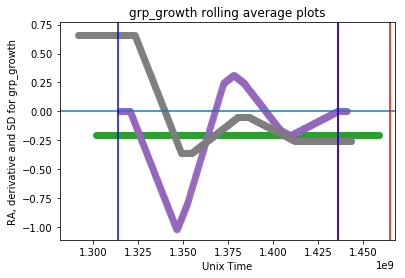

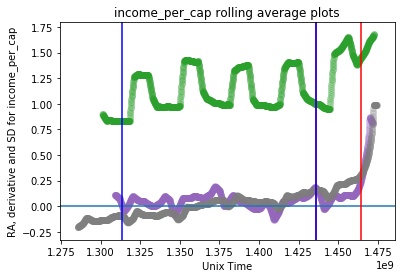

In [18]:
for i in macro_numeric.columns[20:30]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

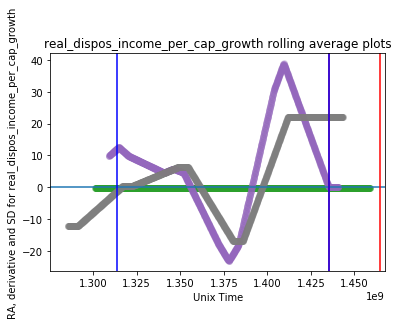

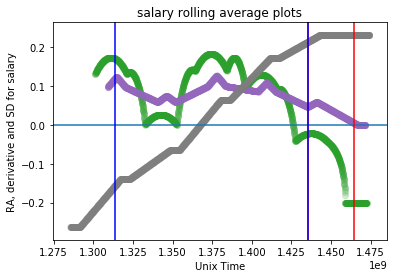

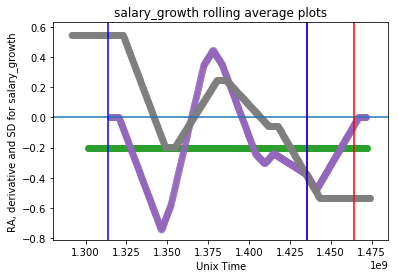

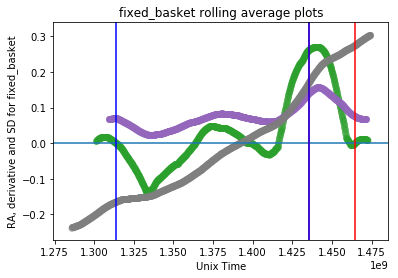

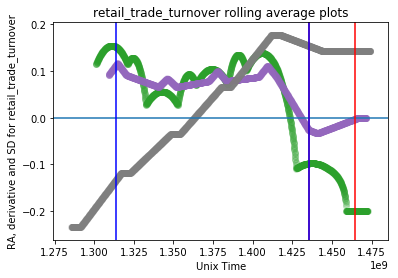

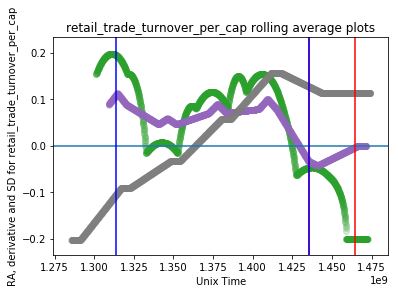

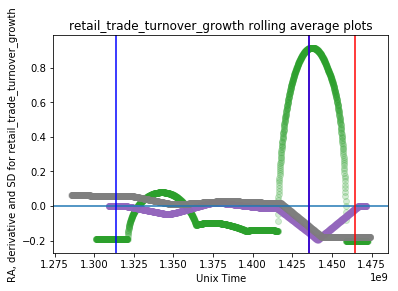

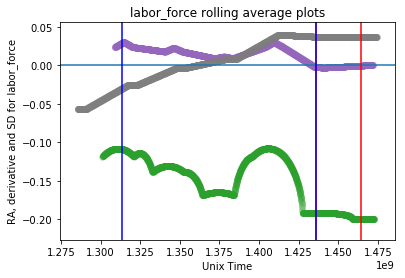

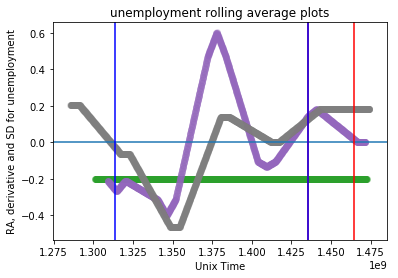

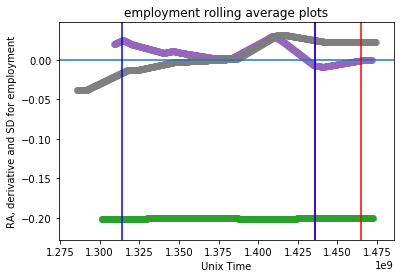

In [19]:
for i in macro_numeric.columns[30:40]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

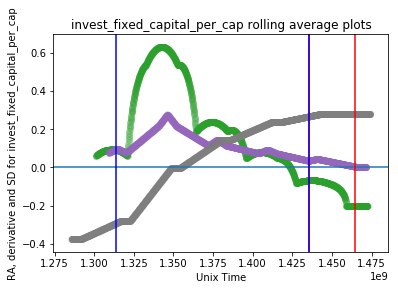

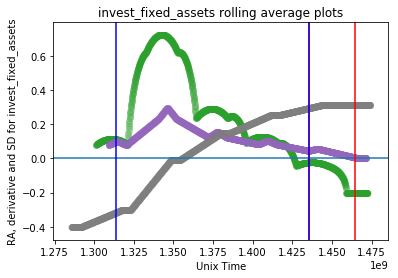

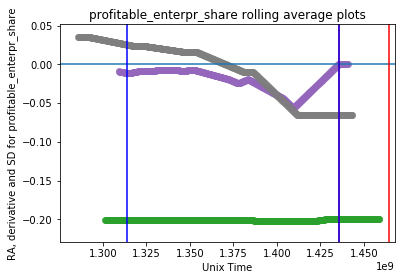

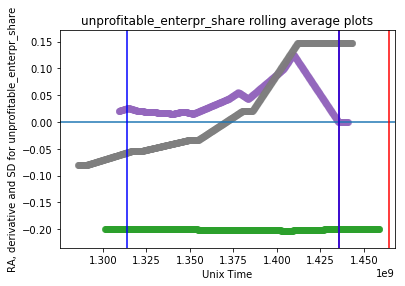

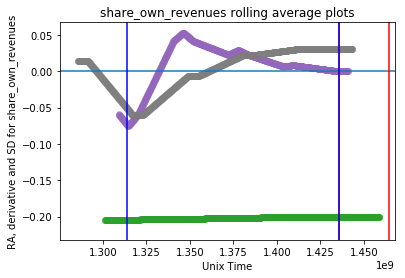

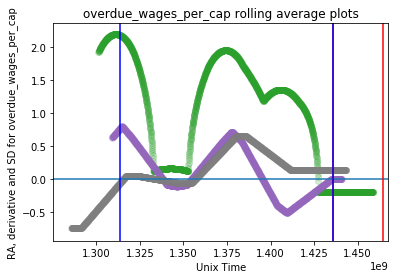

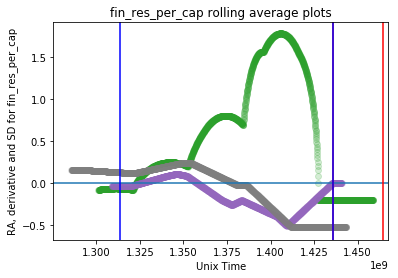

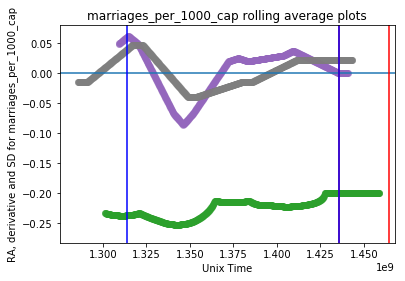

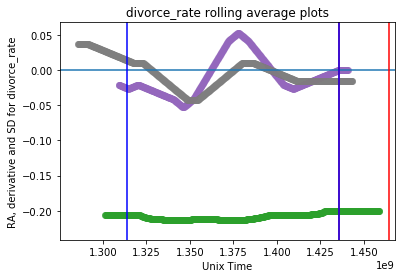

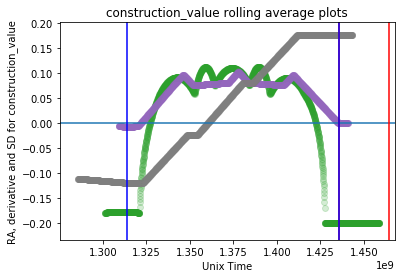

In [20]:
for i in macro_numeric.columns[40:50]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

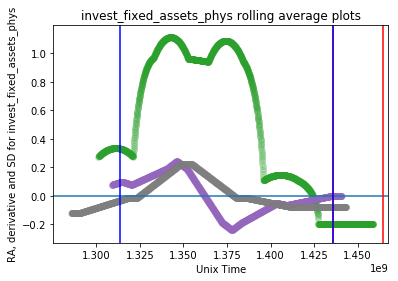

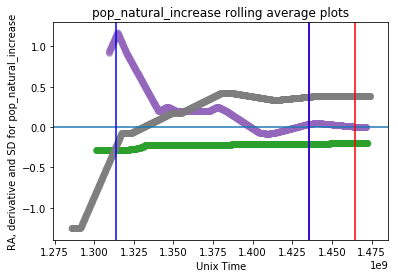

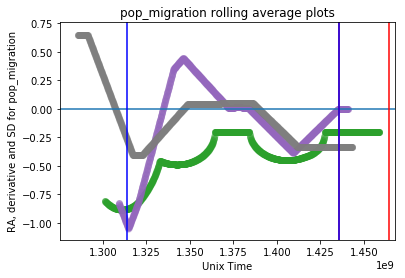

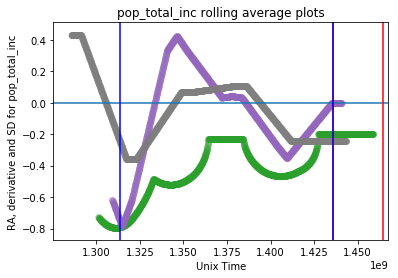

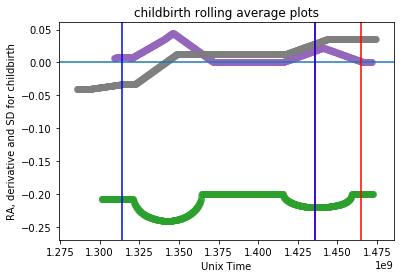

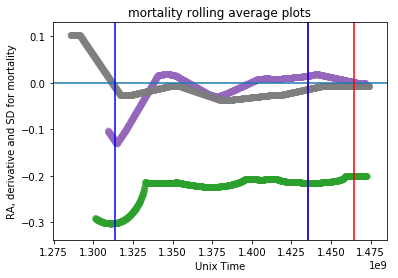

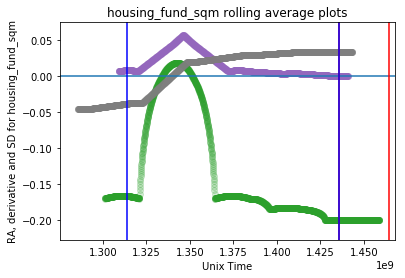

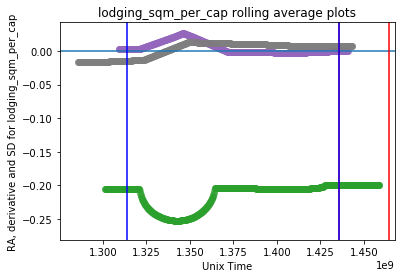

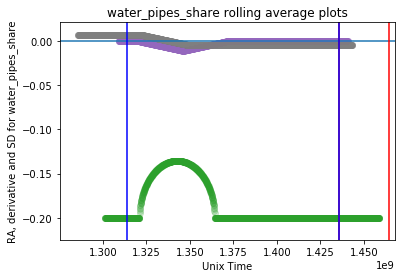

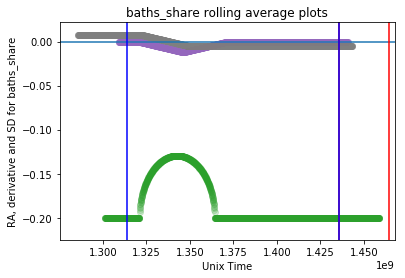

In [21]:
for i in macro_numeric.columns[50:60]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

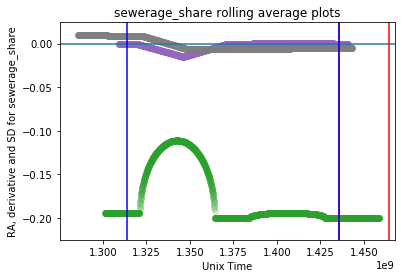

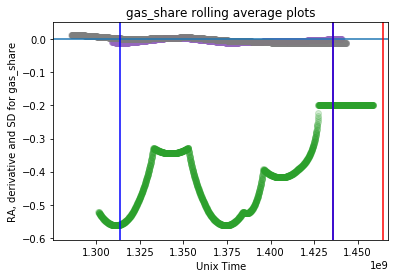

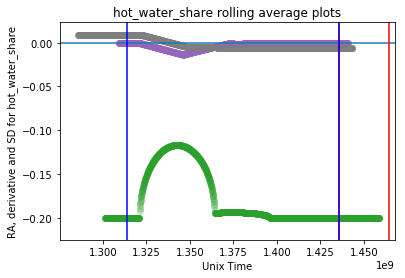

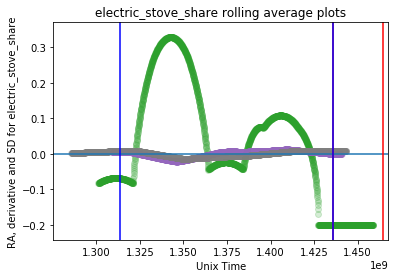

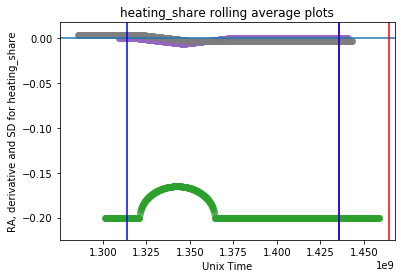

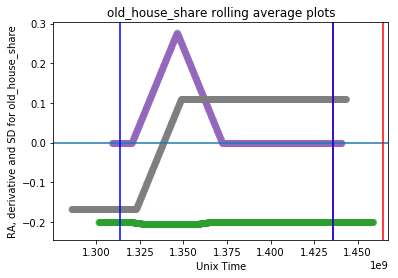

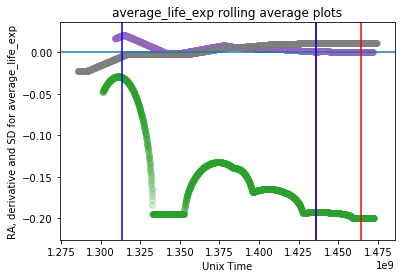

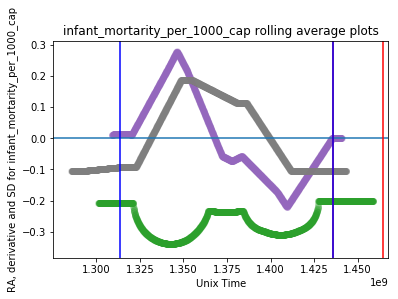

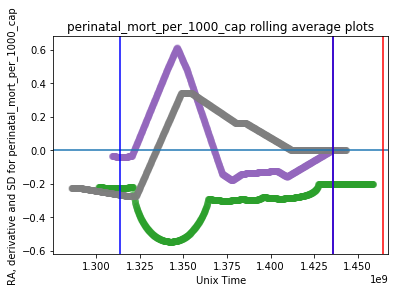

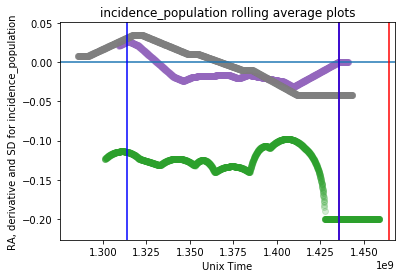

In [22]:
for i in macro_numeric.columns[60:70]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

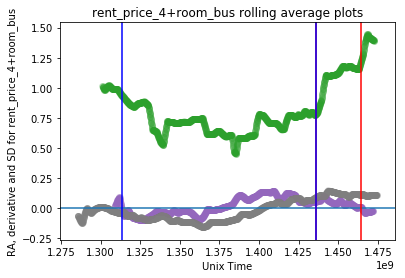

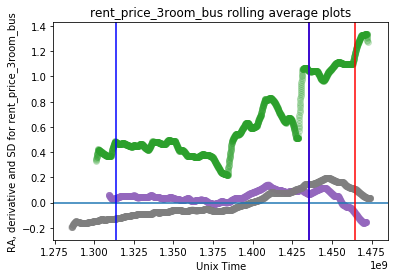

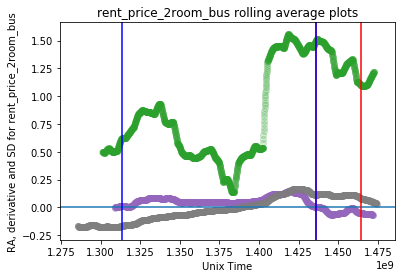

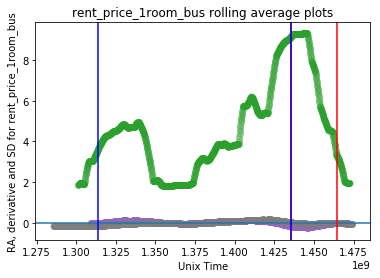

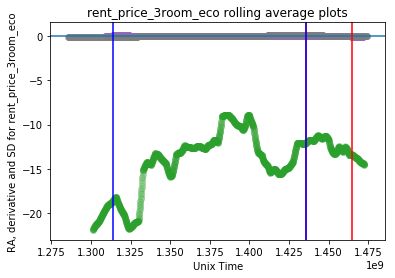

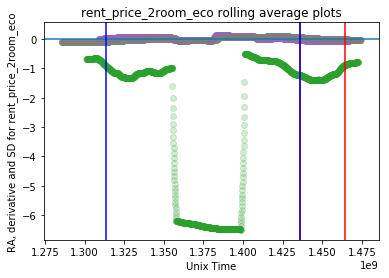

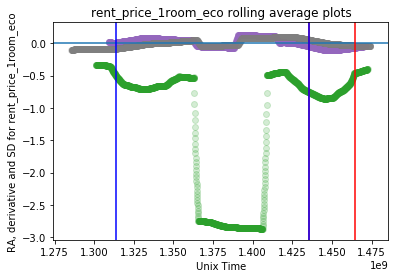

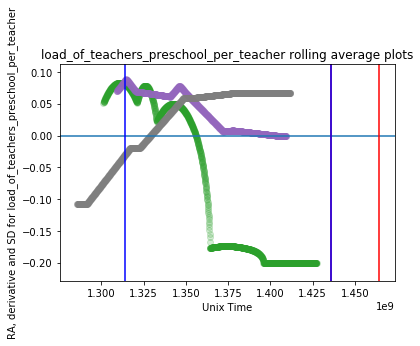

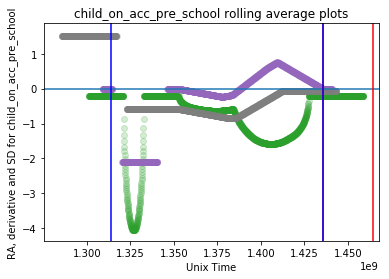

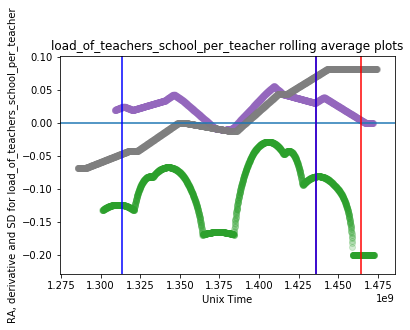

In [23]:
for i in macro_numeric.columns[70:80]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

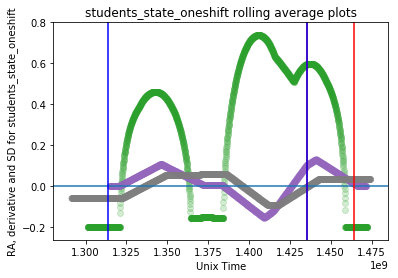

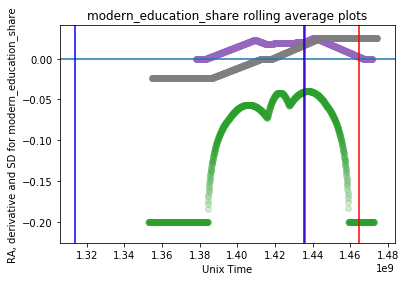

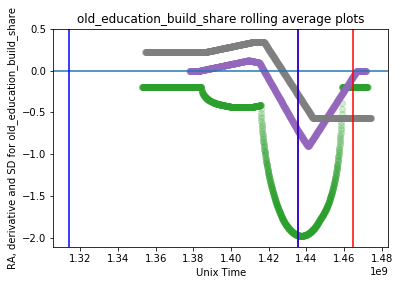

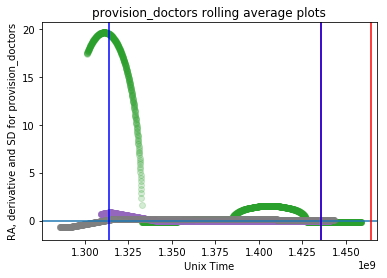

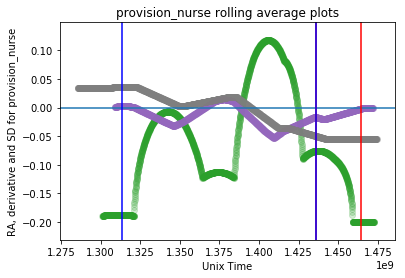

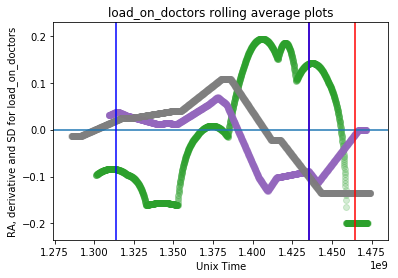

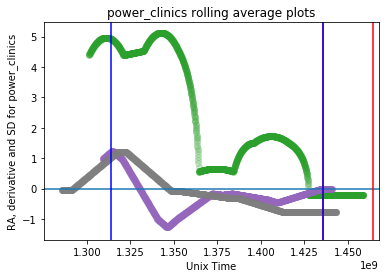

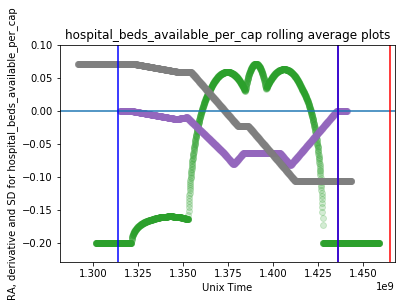

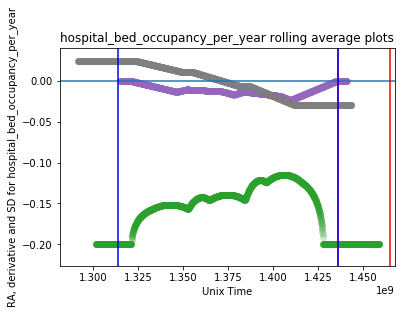

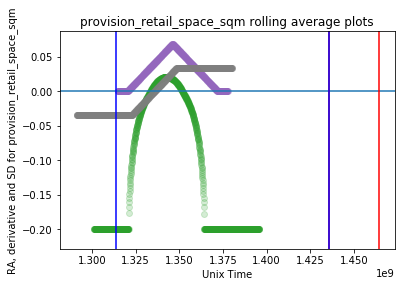

In [24]:
for i in macro_numeric.columns[80:90]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

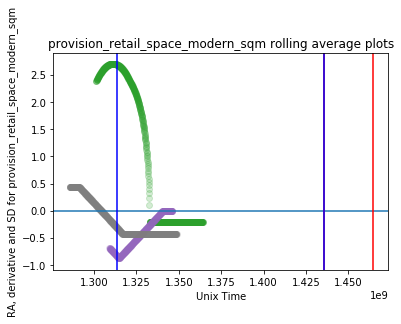

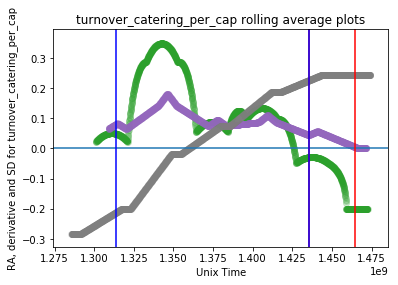

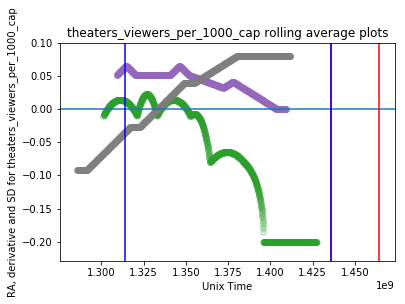

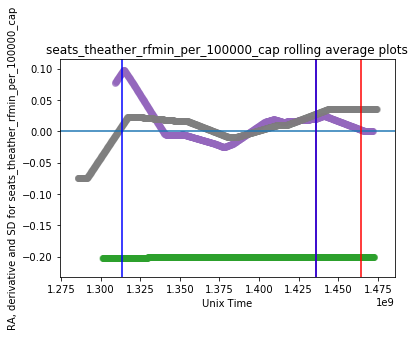

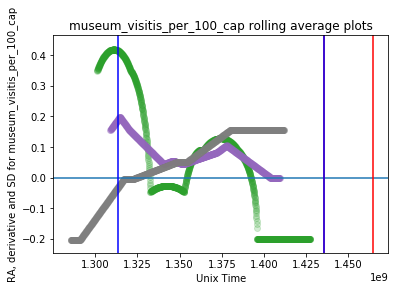

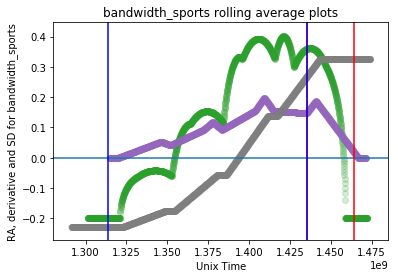

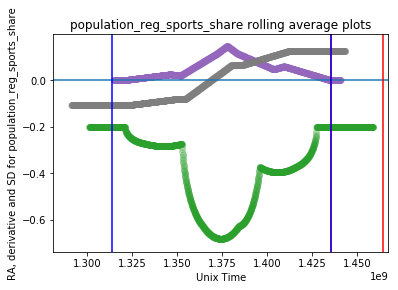

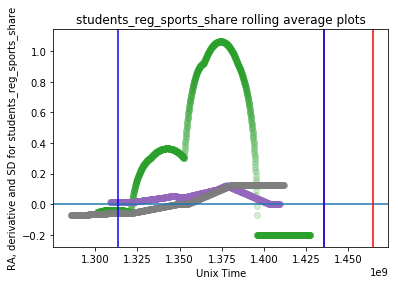

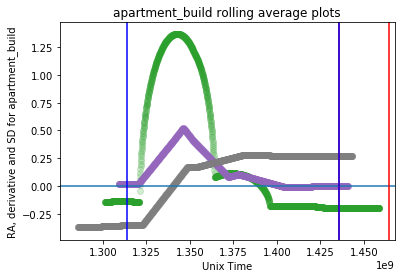

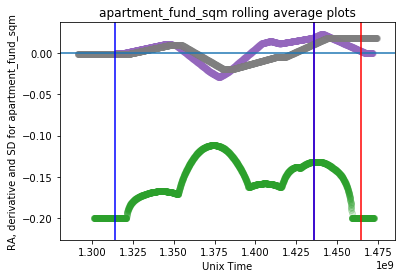

In [25]:
for i in macro_numeric.columns[90:100]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

failed to plot yearquarter



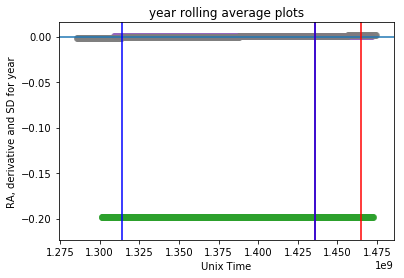

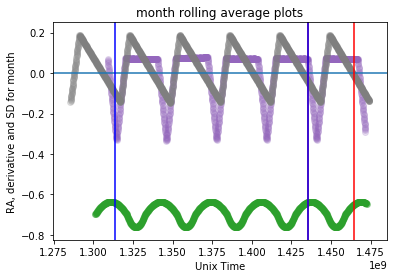

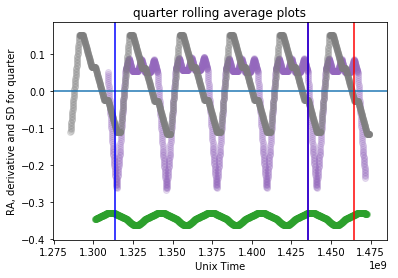

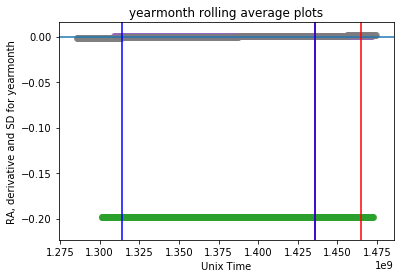

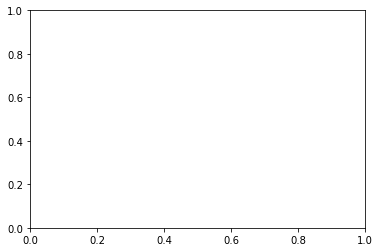

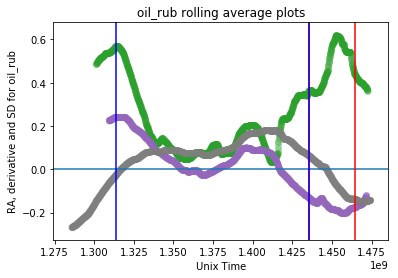

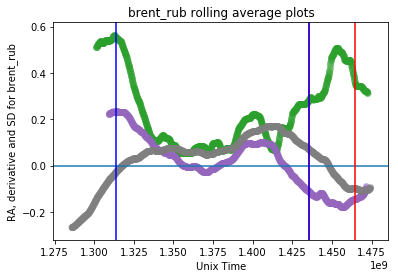

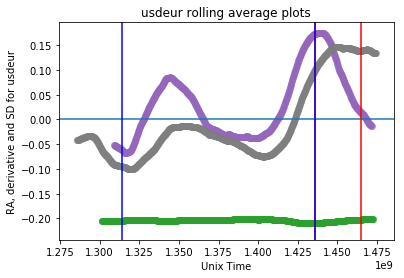

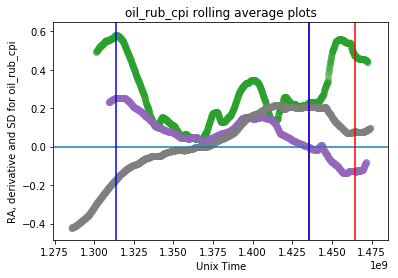

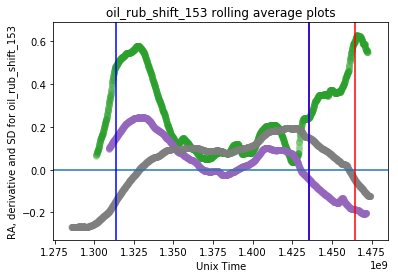

In [27]:
for i in macro_numeric.columns[100:110]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

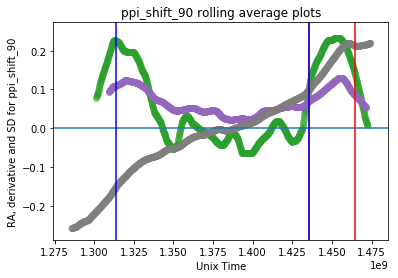

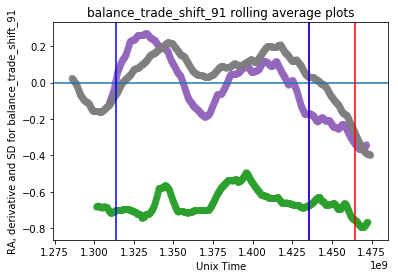

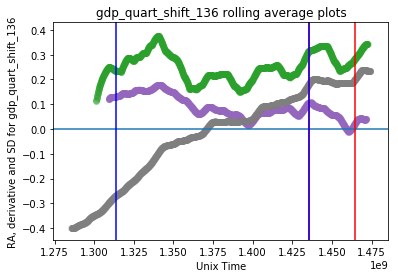

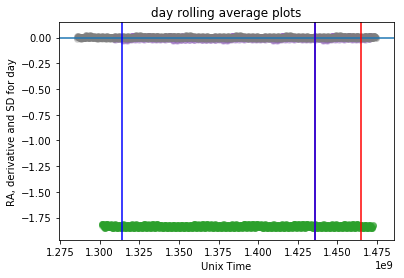

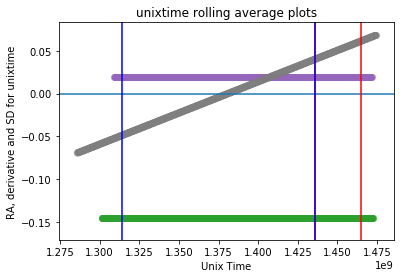

In [28]:
for i in macro_numeric.columns[110:120]:
    try:
        final_plots(i)
    except:
        print 'failed to plot {}\n'.format(i)

In [51]:
# This assignment didnt work, need to rethink tomorrow (27 may 2017)
for col_i in macro_numeric.columns:
    macro_numeric['sd_rolling_{}'.format(col_i)] = 0
    try:
        macro_numeric['sd_rolling_{}'.format(col_i)][500:] = sd_rolling(500, col_i, norm=0, offset=0)
    except:
        pass
    macro_numeric['rolling_deriv_{}'.format(col_i)] = 0
    try:
        macro_numeric['rolling_deriv_{}'.format(col_i)][600:] = derivative_value(unit=300, column_str=col_i, norm=0, offset=0)
    except:
        pass
    macro_numeric['rolling_ave_{}'.format(col_i)] = 0
    try:
        macro_numeric['rolling_ave_{}'.format(col_i)][300:] = rolling_average(unit=300, column_str=col_i, norm=0, offset=0)
    except:
        pass

/Users/samo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/samo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/samo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
print test_numeric['unixtime'][1]
print train_numeric['unixtime'].iloc[-1]
print macro_numeric.shape

1435708800
1435622400
(2484, 463)


In [63]:
#Mergin into test and train
macro_numeric = macro_numeric.ix[:,:'rolling_ave_unixtime']
train_macro = pd.merge(train_numeric,macro_numeric,on='timestamp',how='left')
test_macro = pd.merge(test_numeric,macro_numeric,on='timestamp',how='left')

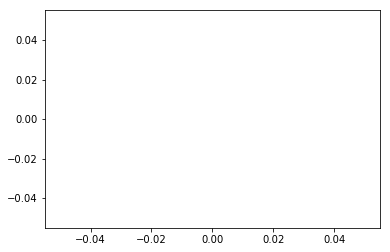

In [68]:
plt.scatter(train_macro['rolling_ave_cpi'],train_macro['log_price_doc'], alpha = 0.2)

Axes(0.125,0.125;0.775x0.755)


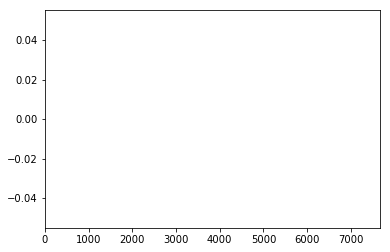

In [80]:
print test_macro['sd_rolling_cpi'].plot()